# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Three observable trends: 1. Latitude seems to be correlated only with temperature, while cloudiness and wind speed are not closely correlated to latitude
#2. The max weather temps matched the current seasons (ie. winter in the northern hemisphere = colder temps for latitudes>0)
#3. Humidity had a minor positive linear regression for the northern hemisphere, and slightly negative for the southern hemisphere


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
weather_df = pd.DataFrame({'City': cities, 'Lat': "", 'Lng':"", 'Max Temp': "", 'Humidity': "", 'Cloudiness': "", 'Wind Speed':"", 'Country': "", 'Date': "", })
                           
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goundam,,,,,,,,
1,castro,,,,,,,,
2,conceicao da barra,,,,,,,,
3,nouakchott,,,,,,,,
4,asfi,,,,,,,,


In [8]:
num_tracker = 1 #counter to keep track and increment when/if needed
set_tracker = 1

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
units ="imperial"


In [9]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

SyntaxError: invalid syntax (Temp/ipykernel_14736/3578181094.py, line 2)

In [10]:
print("Processing...")
for index,row in weather_df.iterrows():
    #set url for api query
    query_url = url +row['City'] + '&APPID=' +weather_api_key
    
    response = requests.get(query_url).json()
    
    try:
        #Message output to nmatch below
        print(f'Processing Weather Data for Record {num_tracker} of Set {set_tracker} | {response["name"]}')
        
        #Load all colled data into weather_df
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
        
        
        #Increment tracker by one so it keeps moving
        num_tracker = num_tracker + 1
      
    except (KeyError, IndexError):
        print("Skipping, not found............")
    
    #If statement to handle the API call limits
    if num_tracker == 51:
        set_tracker = set_tracker + 1
        num_tracker = 1
        time.sleep(60)  
    

Processing...
Processing Weather Data for Record 1 of Set 1 | Goundam
Processing Weather Data for Record 2 of Set 1 | Castro
Processing Weather Data for Record 3 of Set 1 | Conceição da Barra
Processing Weather Data for Record 4 of Set 1 | Nouakchott
Processing Weather Data for Record 5 of Set 1 | Safi
Skipping, not found............
Processing Weather Data for Record 6 of Set 1 | Punta Arenas
Processing Weather Data for Record 7 of Set 1 | Bilibino
Processing Weather Data for Record 8 of Set 1 | Hermanus
Processing Weather Data for Record 9 of Set 1 | Camacha
Processing Weather Data for Record 10 of Set 1 | Iqaluit
Processing Weather Data for Record 11 of Set 1 | Muhafazat Lahij
Processing Weather Data for Record 12 of Set 1 | Westport
Processing Weather Data for Record 13 of Set 1 | Butaritari
Processing Weather Data for Record 14 of Set 1 | Albany
Processing Weather Data for Record 15 of Set 1 | Nikolskoye
Processing Weather Data for Record 16 of Set 1 | Khatanga
Processing Weather 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = weather_df.dropna()

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goundam,16.4145,-3.6708,86.32,8,66,12.33,ML,1645032406
1,castro,-24.7911,-50.0119,81.28,47,2,4.99,BR,1645032407
2,conceicao da barra,-18.5933,-39.7322,84.11,65,99,8.59,BR,1645032245
3,nouakchott,18.0858,-15.9785,85.93,22,28,15.55,MR,1645032407
4,asfi,32.2994,-9.2372,66.16,54,3,20.78,MA,1645032408


In [14]:
#create a second df with only columns with numerical values
weather_df.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,617,617,617,617,617,617,617,617,617
unique,617,559,558,522,87,96,346,121,288
top,goundam,,,,,100,,RU,
freq,1,59,59,59,59,130,59,68,59


In [20]:
non_numeric_cols = ["City", "Country", "Date"]

for col in weather_df.columns:
    if(col not in non_numeric_cols):
        weather_df[col] = pd.to_numeric(weather_df[col])
        
weather_df.dtypes
weather_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goundam,16.4145,-3.6708,86.32,8.0,66.0,12.33,ML,1645032406
1,castro,-24.7911,-50.0119,81.28,47.0,2.0,4.99,BR,1645032407
2,conceicao da barra,-18.5933,-39.7322,84.11,65.0,99.0,8.59,BR,1645032245
3,nouakchott,18.0858,-15.9785,85.93,22.0,28.0,15.55,MR,1645032407
4,asfi,32.2994,-9.2372,66.16,54.0,3.0,20.78,MA,1645032408
...,...,...,...,...,...,...,...,...,...
612,tidore,NaN,NaN,NaN,NaN,NaN,NaN,,
613,tocopilla,-22.0920,-70.1979,73.53,69.0,23.0,11.03,CL,1645033288
614,vila,42.0304,-8.1588,47.28,94.0,100.0,4.65,PT,1645033288
615,manggar,-2.8833,108.2667,80.26,78.0,94.0,2.46,ID,1645033289


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#check if there are any cities with >100% humidity
max_humidity = weather_df["Humidity"].describe(include = "all")
max_humidity

count    558.000000
mean      72.385305
std       22.498201
min        7.000000
25%       59.000000
50%       77.000000
75%       90.000000
max      100.000000
Name: Humidity, dtype: float64

In [22]:
#  Get the indices of cities that have humidity over 100%.
#-------See above output, no humidity level above 100%-----

In [23]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goundam,16.4145,-3.6708,86.32,8.0,66.0,12.33,ML,1645032406
1,castro,-24.7911,-50.0119,81.28,47.0,2.0,4.99,BR,1645032407
2,conceicao da barra,-18.5933,-39.7322,84.11,65.0,99.0,8.59,BR,1645032245
3,nouakchott,18.0858,-15.9785,85.93,22.0,28.0,15.55,MR,1645032407
4,asfi,32.2994,-9.2372,66.16,54.0,3.0,20.78,MA,1645032408


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

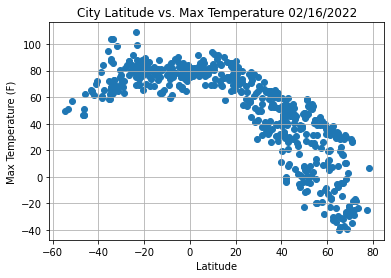

In [26]:
#Create a scatter plot comparing latitude and temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
#Notes on plot: Based on the current seasons in both hemispheres, it appears based on the plot that the lowest temperatures are occuring highest above the equator currently, while those cities farthest south of the equator are currently the warmest.
#The plot also shows a fairly consistent temperature distribution around the equator, which is to be expected.

## Latitude vs. Humidity Plot

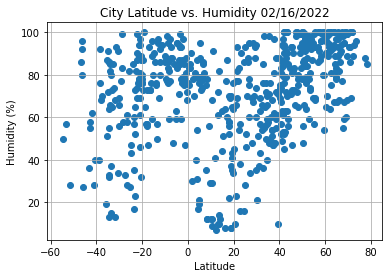

In [28]:
#Create a scatter plot comparing latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
#Notes on plot: Based on the distribution of the scated plot, it appears that humidity of 60% or above is more frequent than lower humidity levels.
#The plot also shows that a linear regression will be needed to determine any correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

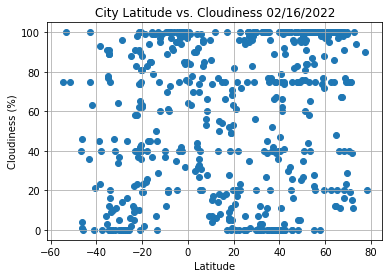

In [29]:
#Create a scatter plot comparing latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
#Notes on plot: Very similar to the humidity vs. latitude plot, the distribution seems scattered upon first view, which makes sense since weather patterns are hard to predict on a consistent basis
#The plot also shows that a linear regression will be needed to determine any correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

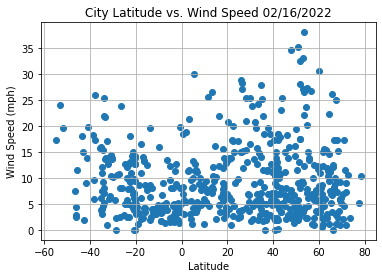

In [41]:
#Create a scatter plot comparing latitude and wind speed

weather_df.dropna(inplace=True)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
#Notes on plot: Based on the plot, it appears that the significant majority of cities across the world have wind speeds of less than 20mph
#The plot also shows that a linear regression will be needed to determine any correlation between latitude and wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

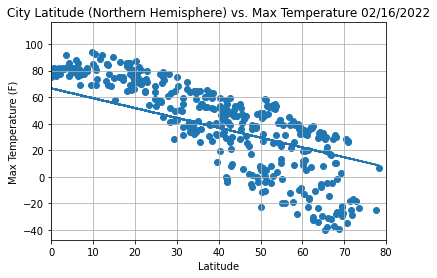

<Figure size 432x288 with 0 Axes>

In [51]:

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title(f'City Latitude (Northern Hemisphere) vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Max Temp"], 1,)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

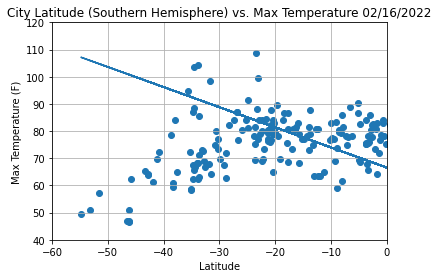

<Figure size 432x288 with 0 Axes>

In [46]:

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title(f'City Latitude (Southern Hemisphere) vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylim(40,120)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Max Temp"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig6.png")

In [ ]:
#Notes on Hemisphere vs. Max Temp.:
#Northern hemisphere: since the northern hemisphere is currently in winter,  the linear regression line shows that the farther away from the equator, the colder the max temperature
#Southern hemisphere: since the southern hemisphere is currently in summer,  the linear regression line shows that the to the equator, the colder the max temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

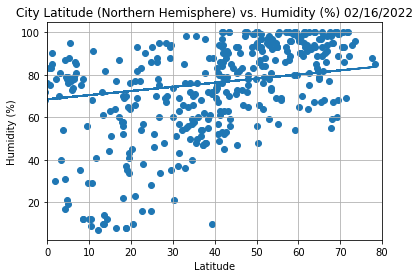

<Figure size 432x288 with 0 Axes>

In [47]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title(f'City Latitude (Northern Hemisphere) vs. Humidity (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Humidity"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

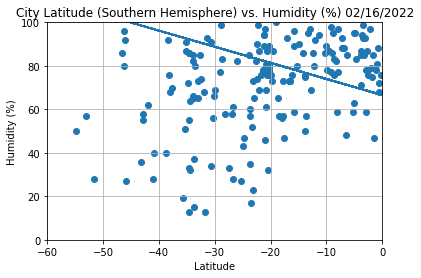

<Figure size 432x288 with 0 Axes>

In [48]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title(f'City Latitude (Southern Hemisphere) vs. Humidity (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylim(0,100)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Max Temp"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig8.png")

In [ ]:
#Northern hemisphere: based on the linear regression, it appears that humidity slightly increases as you get farther from the equator
#Southern hemisphere: based on the linear regression, it appears that humidity decreases as you get closer to the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

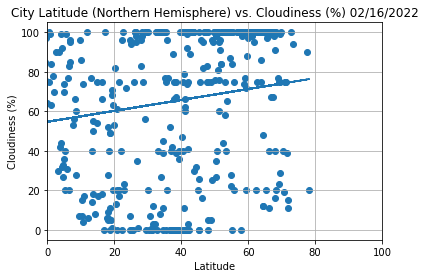

<Figure size 432x288 with 0 Axes>

In [56]:

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title(f'City Latitude (Northern Hemisphere) vs. Cloudiness (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(0,100)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Cloudiness"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

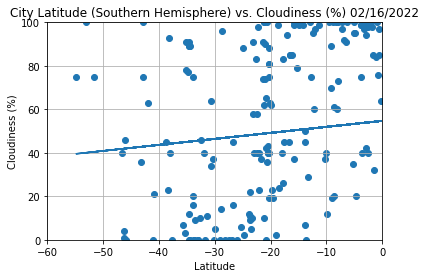

<Figure size 432x288 with 0 Axes>

In [52]:

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title(f'City Latitude (Southern Hemisphere) vs. Cloudiness (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylim(0,100)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Cloudiness"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig10.png")

In [ ]:
#Northern hemisphere: based on the linear regression, it appears that cloudiness slightly increases as you get farther from the equator
#Southern hemisphere: based on the linear regression, it appears that cloudiness slightly increases as you get closer to the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

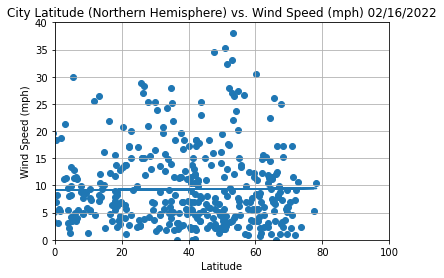

<Figure size 432x288 with 0 Axes>

In [55]:

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title(f'City Latitude (Northern Hemisphere) vs. Wind Speed (mph) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(0,100)
plt.ylim(0,40)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Wind Speed"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

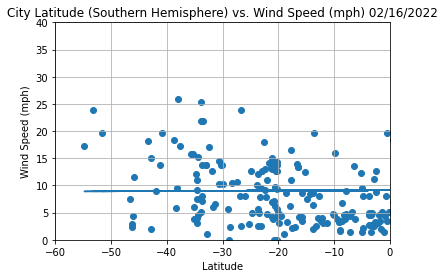

<Figure size 432x288 with 0 Axes>

In [57]:

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title(f'City Latitude (Southern Hemisphere) vs. Wind Speed (mph) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylim(0,40)
plt.grid(True)

#Add linear regression on top of scatter plot
m, b = np.polyfit(weather_df["Lat"],weather_df["Wind Speed"], 1)
plt.plot(x, m*x + b)

# Show plot
plt.show()


# Save the figure
plt.savefig("../output_data/Fig12.png")

In [ ]:
#Northern hemisphere: based on the linear regression, it appears that wind speed remains pretty constant across the hemisphere
#Southern hemisphere: based on the linear regression, it appears that wind speed remains pretty constant across the hemisphere